In [1]:
# ! pip install scanninglaw
# ! pip install astromet

Identify binary systems that posses signatures of dark companions in Gaia data using RUWE for the selection and infer the mass and period of the dark companion. 

RUWE - re-normalized quare root of the reduced chi-square

Use RUWE to select the star systems to analyze. Look for high RUWE

High RUWE are dominated by sources with unmodelled extra contributions of noise, most ubiquitously caused by binary (and higher multiple) systems

(RUWE is expected to be around 1.0 for sources where the single-star model provides a good fit to the astrometric observations. A value significantly greater than 1.0 (say, >1.4) could indicate that the source is non-single or otherwise problematic for the astrometric solution.)

Possible projects explorations 

- Identify semi resolved systems from gaia to look for systems with star clusters near a black hole and identify them
- Use ML to classify objects in the Gaia DR3 catalogue: apply labels such as “galaxy nucleus”, “binary star”, “star-forming region”

# Signatures of dark companions in Gaia data. 

Using the formalism in Andrew et al, the mass of a dark companion (BH or NS) can be estimated if both RUWE and Radial Velocity error are available. 

Using population synthesis and the astromet software generate mock Gaia data and predict the distribution of companion masses (or mass ratios) for sources in Gaia DR3.

### (Part 1) Simulated Data

##### Simulate physical and viewer specific parameters for nTest systems

##### Calculate spectroscopic and astrometric error for N <= B using $\zeta_0$ and $\beta_0$ respectively

##### Calculate inferred P and q

### (Part 2) Gaia DR3 Data

##### Apply the above to Gaia DR3 data and compare to APOGEE

##### Filter out rv_method_used=1, RUWEast > 1.25 and RUWEspec > 2, q > 1 and m2 > 3M⊙, RUWEphot < 2

## Imports

In [2]:
import numpy as np
import pandas as pd
import astropy
from astropy import units as u
import astromet
#import dev.astromet.astromet as astromet
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm.notebook import tqdm
import scanninglaw.times
from scanninglaw.source import Source

### Set Constants

In [3]:
# 1 solar mass
m_1 = 1.989e+30 # in kg 

# set the value for G
G = 6.67430e-11 # in m^3 kg^-1 s^-2

# Astronomical Unit
AU = 1.496e+11 # in m

In [4]:
# # 1 solar mass
# m_1 = 1 # in kg 

# # set the value for G
# G = 1 # in m^3 kg^-1 s^-2

# # Astronomical Unit
# AU = 1 # in m

## Decompress CommandedScanLaw_001.csv.gz file

In [5]:
# import gzip
# import shutil

# # Define the input and output file paths
# input_gz_file = 'data/CommandedScanLaw_001.csv.gz'
# output_csv_file = 'data/CommandedScanLaw_001.csv'

# # Open the gzipped file and write its content to the new CSV file
# with gzip.open(input_gz_file, 'rb') as f_in:
#     with open(output_csv_file, 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# print(f'File {input_gz_file} has been decompressed to {output_csv_file}')

### Load ScanLaw file

In [6]:
local_csv_filename = "data/CommandedScanLaw_001.csv"

# Load the scanning law times from a local CSV file with the specified filename and version
dr3_sl = scanninglaw.times.Times(map_fname=local_csv_filename, version='dr3_nominal')


Loading auxilliary data ...
t = 26.802 s
  auxilliary:  14.880 s
          sf:   3.212 s
interpolator:   8.710 s


In [7]:
dr3Period=34/12 # Calculate the period in years by dividing 34 by 12
mas=astromet.mas # conversion from degrees to milli-arcseconds

## Generate nTest simulated star systems

##### Simulation of 

##### REFERENCE: code from astromet - https://github.com/zpenoyre/astromet.py/blob/master/gaiaBinarySynth.ipynb

In [8]:
# nTest=10000
# dataNames=('RA','Dec','pmRA','pmDec','pllx',
#            'M_tot','q','l','a','e','P','tPeri',
#            'vTheta','vPhi','vOmega',
#            'predict_dTheta','simple_dTheta',
#            'N_obs','sigma_al','sigma_ac',
#            'fit_ra','fit_dec','fit_pmrac','fit_pmdec','fit_pllx',
#            'sigma_rac','sigma_dec','sigma_pmrac','sigma_pmdec','sigma_pllx',
#            'N_vis','frac_good','AEN','UWE'
#           )
# allData=astropy.table.Table(names=dataNames)

# alError=1
# #acError=0.3  -- currently ignoring across scan measurements (~negligible change)

# # we'll generate nTest sets of parameters, and test each with a 0, 2 ,5 and 10 mSun BH
# for i in tqdm(range(nTest)):
#     allData.add_row()
#     thisRow=allData[i]
    
#     params=astromet.params()
#     params.ra=360*np.random.rand()
#     params.dec=np.arcsin(-1+2*np.random.rand())*180/np.pi
    
#     c=Source(params.ra,params.dec,unit='deg')
#     sl=dr3_sl(c, return_times=True, return_angles=True)
#     ts=2010+np.squeeze(np.hstack(sl['times']))/365.25
#     sort=np.argsort(ts)
#     ts=np.double(ts[sort])
    
#     phis=np.squeeze(np.hstack(sl['angles']))[sort]
    
#     params.parallax=10*np.power(np.random.rand(),-1/3) # all within 100 pc
#     params.pmrac=params.parallax*(1)*np.random.randn()
#     params.pmdec=params.parallax*(1)*np.random.randn()
#     params.period=10**np.random.uniform(-2.3, 2, 1) # periods between 0.03 and 30 years
#     params.l=np.random.rand() # uniform light ratio
#     params.q=10**np.random.uniform(-3.2, 2.2, 1) # mass ratios between 0 and 4 (half less than 1)
#     params.a=10*np.random.rand()**2
#     params.e=np.random.uniform(0, 1, 1)
#     params.vtheta=np.arccos(np.random.uniform(0, np.pi, 1))
#     params.vphi=np.random.uniform(0, 2*np.pi, 1)
#     params.vomega=2*np.pi*np.random.rand()
#     orbitalPhase=np.random.rand() # fraction of an orbit completed at t=0
#     params.tperi=params.period*orbitalPhase
    
#     thisRow['RA']=1.*params.ra
#     thisRow['Dec']=1.*params.dec
#     thisRow['pmRA']=params.pmrac
#     thisRow['pmDec']=params.pmdec
#     thisRow['pllx']=params.parallax
#     thisRow['M_tot']=4*(np.pi**2)*astromet.Galt/((params.period**2)*(params.a**3))
#     thisRow['q']=params.q
#     thisRow['l']=params.l
#     thisRow['a']=params.a
#     thisRow['e']=params.e
#     thisRow['P']=params.period
#     thisRow['tPeri']=1.*params.tperi
#     thisRow['vTheta']=params.vtheta
#     thisRow['vPhi']=params.vphi
#     thisRow['vOmega']=params.vomega
#     thisRow['sigma_al']=alError
#     #thisRow['sigma_ac']=acError

#     trueRacs,trueDecs=astromet.track(ts,params)

#     # added .astype(float) to avoid astromet error
#     phis = phis.astype(float)
    
#     t_obs,x_obs,phi_obs,rac_obs,dec_obs=astromet.mock_obs(ts,phis,trueRacs,trueDecs,err=alError)
    
#     fitresults=astromet.fit(t_obs,x_obs,phi_obs,alError,params.ra,params.dec)
#     results=astromet.gaia_results(fitresults)
    
#     # print('ra, dec, pllx, pmrac, pmdec ',params.ra,params.dec,params.parallax,params.pmrac,params.pmdec)
#     # print(results)
    
#     # bug somewhere in these
#     #thisRow['simple_dTheta']=astromet.dtheta_simple(params)
#     #thisRow['predict_dTheta']=astromet.dtheta_full(params,np.min(ts),np.max(ts))  
    
#     thisRow['fit_ra']=results['ra']
#     thisRow['fit_dec']=results['dec']
#     thisRow['fit_pmrac']=results['pmra']
#     thisRow['fit_pmdec']=results['pmdec']
#     thisRow['fit_pllx']=results['parallax']

#     thisRow['sigma_rac']=results['ra_error']
#     thisRow['sigma_dec']=results['dec_error']
#     thisRow['sigma_pmrac']=results['pmra_error']
#     thisRow['sigma_pmdec']=results['pmdec_error']
#     thisRow['sigma_pllx']=results['parallax_error']

#     # results['UWE'] --> results['uwe']
#     thisRow['UWE']=results['uwe']

#     thisRow['N_obs']=results['astrometric_n_obs_al']
#     #thisRow['frac_good']=results['astrometric_n_good_obs_al']/results['astrometric_n_obs_al']
#     thisRow['N_vis']=results['visibility_periods_used']
#     #thisRow['AEN']=results['astrometric_excess_noise']

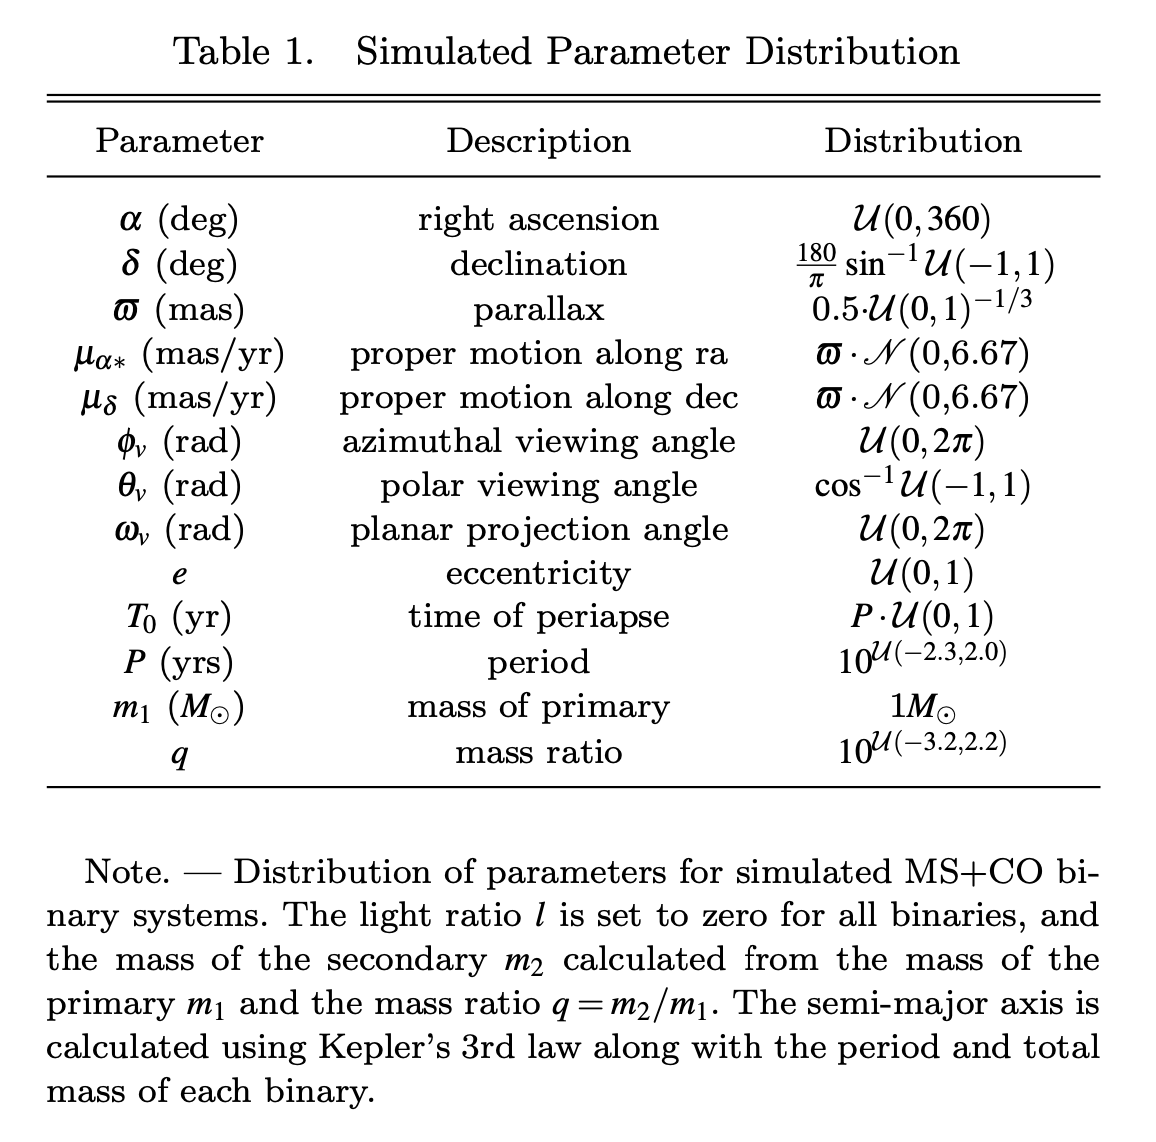

In [9]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/sim_param_distr.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


In [10]:
# # Convert the astropy table to a pandas DataFrame
# df = allData.to_pandas()

# Export the DataFrame to a CSV file named '100k.csv' in the current folder
# df.to_csv('data/100k.csv', index=False)

# # print the column names
# print(df.columns)


In [11]:
# read the CSV file back into a DataFrame
df = pd.read_csv('data/100k.csv')

# print the column names
print(df.columns)

Index(['RA', 'Dec', 'pmRA', 'pmDec', 'pllx', 'M_tot', 'q', 'l', 'a', 'e', 'P',
       'tPeri', 'vTheta', 'vPhi', 'vOmega', 'predict_dTheta', 'simple_dTheta',
       'N_obs', 'sigma_al', 'sigma_ac', 'fit_ra', 'fit_dec', 'fit_pmrac',
       'fit_pmdec', 'fit_pllx', 'sigma_rac', 'sigma_dec', 'sigma_pmrac',
       'sigma_pmdec', 'sigma_pllx', 'N_vis', 'frac_good', 'AEN', 'UWE'],
      dtype='object')


In [12]:
df.head()

,RA,Dec,pmRA,pmDec,pllx,M_tot,q,l,a,e,...,fit_pllx,sigma_rac,sigma_dec,sigma_pmrac,sigma_pmdec,sigma_pllx,N_vis,frac_good,AEN,UWE
0,295.530192,-53.428624,-9.386071,-42.720407,24.334074,371.363725,0.803208,0.725366,0.227195,0.035555,...,24.495657,0.102894,0.091068,0.125343,0.099515,0.130083,14.0,0.0,0.0,1.023314
1,353.640846,60.857677,7.200350,-9.298720,10.396245,11729.386237,0.062592,0.611730,1.288977,0.392085,...,9.209926,0.144678,0.135985,0.173277,0.170122,0.172320,26.0,0.0,0.0,2.068644
2,327.009800,-59.207739,73.901917,-17.043706,38.878545,3991.665303,2.207873,0.523663,6.477016,0.211138,...,73.733178,1.840600,2.189442,1.892233,3.183428,2.955779,26.0,0.0,0.0,36.058845
3,20.408336,-30.971881,-0.126071,12.921704,10.426781,121878.643708,2.494288,0.667644,1.533567,0.965223,...,11.266400,0.223519,0.185313,0.248781,0.236878,0.307336,20.0,0.0,0.0,2.824837
4,84.738718,-14.590569,-6.188792,9.317418,10.983250,0.048591,0.390578,0.264707,6.062858,0.584619,...,10.928319,0.080213,0.079809,0.096336,0.099302,0.114327,22.0,0.0,0.0,1.038968


In [13]:
# Keep in the dataframe only Periods less than dr3Period = 2.8333333333333335 years
df = df[df['P'] <= dr3Period]


### Calculate N

In [14]:
# N = dr3Period / df['P'] create a new column 'N' in the DataFrame
df['N_orb'] = df['P'] / dr3Period

In [15]:
df['N_orb']

1        0.087912
2        0.013379
3        0.021015
5        0.045866
6        0.377246
           ...   
99993    0.184417
99994    0.012415
99995    0.264004
99996    0.040979
99997    0.061956
Name: N_orb, Length: 65246, dtype: float64

### Spectroscopic and Astrometric error calculation for case N <= B

$\sigma_{spec}$ = spectroscopic observational errors in spectroscopic measurements

$\sigma_{ast}$ = astrometric observational errors in astrometric measurements

$\sigma_{{b},{vr}}$ = the standard deviation of measurements of the radial velocity of a binary system

$\sigma_{{b},{\theta}}$ = astrometric observational errors in astrometric measurements

### Calculate $\zeta_0$ (P = B)

##### this result agrees well for all P < B but deviates at longer periods - Andrew et al

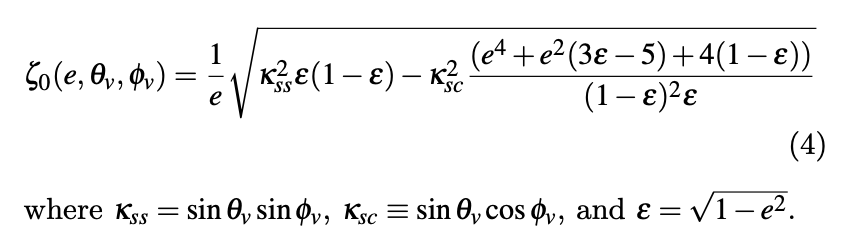

In [16]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/zeta_0.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


In [17]:
# write a function that calculates the values of zeta_0 for a given set of parameters e, vtheta, vphi
# in terms of e, k_ss = sin(vtheta)sin(vphi), k_sc = sin(vtheta)cos(vphi) and epsilon = sqrt(1-e^2)
def zeta_0(ecc, vTheta, vPhi):
    
    k_ss = np.sin(vTheta)*np.sin(vPhi)
    k_sc = np.sin(vTheta)*np.cos(vPhi)
    epsilon = np.sqrt(1-ecc**2)

    term_1 = (1/ecc)
    term_2 = (k_ss**2)*epsilon*(1-epsilon)
    term_3 = (k_sc**2)*(((ecc**4)+(ecc**2)*(3*epsilon-5)+(4*(1-epsilon)))/(((1-epsilon)**2)*epsilon))

    zeta = term_1 * np.sqrt(term_2 - term_3)
    return zeta

# test the function on df['e'], df['vTheta'], df['vPhi']
df['zeta_0'] = zeta_0(df['e'], df['vTheta'], df['vPhi'])


/Users/ynwa1995/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Calculate $\beta_0$ (P = B)

##### this result agrees well for all P < B but deviates at longer periods - Andrew et al

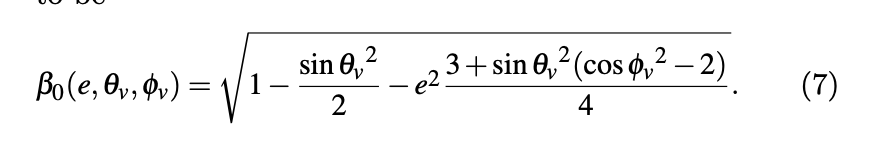

In [18]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/beta_0.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


In [19]:
# write a function that calculates the values of zeta_0 for a given set of parameters e, vtheta, vphi
# in terms of e, k_ss = sin(vtheta)sin(vphi), k_sc = sin(vtheta)cos(vphi) and epsilon = sqrt(1-e^2)
def beta_0(ecc, vTheta, vPhi):

    term_1 = (np.sin(vTheta)**2)/2
    term_2 = (ecc**2)*(3+(np.sin(vTheta)**2)*((np.cos(vPhi)**2)-2))/4

    beta = np.sqrt(1 - term_1 - term_2)
    return beta

# calculate beta_0 for all the data points in the dataframe
df['beta_0'] = beta_0(df['e'], df['vTheta'], df['vPhi'])


# Plot $\Theta_{\nu}$ vs $\Phi_{\nu}$

##### for $ecc = [0.01 \text{ to } 0.99]$ 
##### *color-mapped by* *$\zeta_0$*, *$\beta_0$*, *$\frac{\zeta_0}{\beta_0}$*, *$\frac{\zeta_0^2}{\beta_0}$*

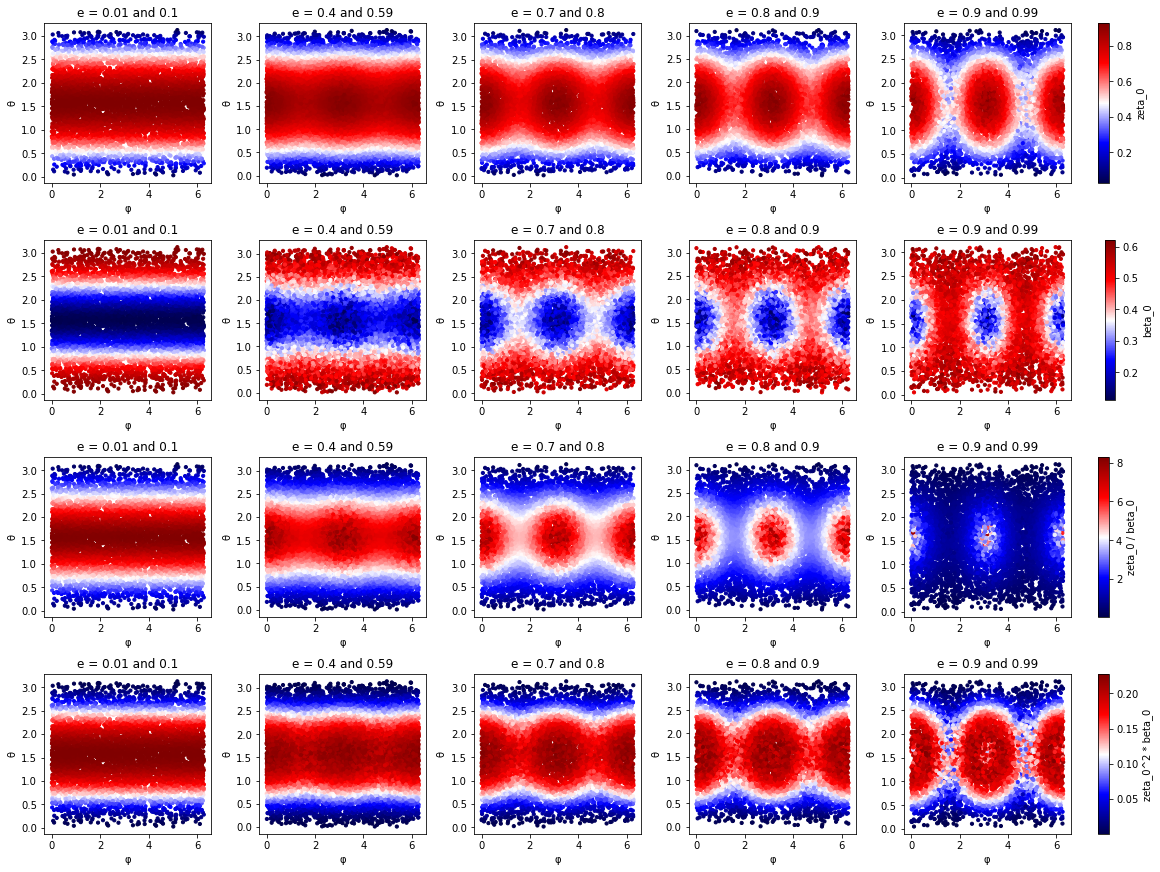

In [20]:
import matplotlib.pyplot as plt

# Define the eccentricity ranges and corresponding dataframes
eccentricity_ranges = [
    (0.01, 0.1),
    (0.4, 0.59),
    (0.7, 0.8),
    (0.8, 0.9),
    (0.9, 0.99)
]

dataframes = [
    df[(df['e'] >= e_min) & (df['e'] <= e_max)]
    for e_min, e_max in eccentricity_ranges
]

# Define the color codes and their labels
color_codes = [
    ('zeta_0', 'zeta_0', lambda df: df['zeta_0']),
    ('beta_0', 'beta_0', lambda df: df['beta_0']),
    ('zeta_0/beta_0', 'zeta_0 / beta_0', lambda df: df['zeta_0'] / df['beta_0']),
    ('zeta_0**2 * beta_0', 'zeta_0^2 * beta_0', lambda df: (df['zeta_0']**2) * df['beta_0'])
]

# Create a figure with 20 subplots
fig, axs = plt.subplots(4, 5, figsize=(16, 12), constrained_layout=True)

# Loop over the eccentricity ranges and color codes to create the subplots
for row, (color_code, color_label, color_func) in enumerate(color_codes):
    for col, (e_min, e_max) in enumerate(eccentricity_ranges):
        df_filtered = dataframes[col]
        # i want a color map from top to bottom blue green yellow orange red
        scatter = axs[row, col].scatter(df_filtered['vPhi'], df_filtered['vTheta'], c=color_func(df_filtered), cmap='seismic', s=10)
        axs[row, col].set_title(f'e = {e_min} and {e_max}')
        axs[row, col].set_xlabel('φ')
        axs[row, col].set_ylabel('θ')
    
    # Add a color bar for the entire row
    cbar = fig.colorbar(scatter, ax=axs[row, :], orientation='vertical')
    cbar.set_label(color_label)

plt.show()

# Calculate Radial Velocity Error

#### Assume P<=B and zeta = zeta_0

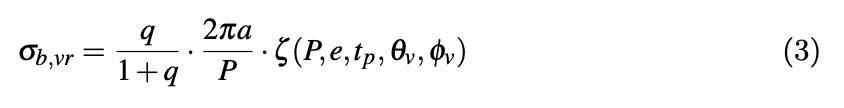

In [21]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/spectr_error.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


In [22]:
# write a function that calculates the values of sigma spectroscopic error for a given set of parameters e, vtheta, vphi

def sigma_spectroscopic_error(q, a, P, zeta_0):
    term_1 = q/(1+q)
    term_2 = (2*np.pi*a)/P
    term_3 = zeta_0

    sigma = term_1*term_2*term_3
    return sigma

# calculate sigma_spectroscopic_error for all the data points in the dataframe
df['sigma_spectroscopic_error'] = sigma_spectroscopic_error(df['q'], df['a'], df['P'], df['zeta_0'])

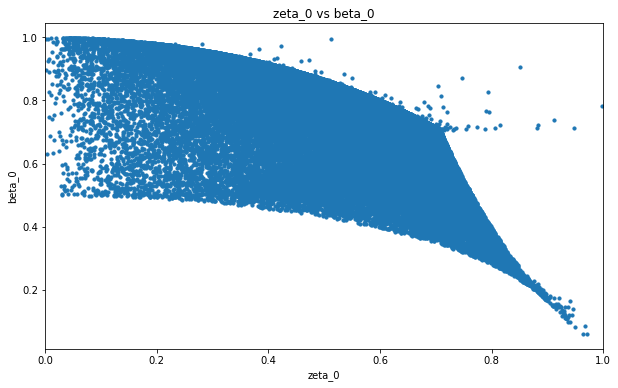

In [23]:
# plot df['zeta_0'] vs df['beta_0']
plt.figure(figsize=(10, 6))
plt.scatter(df['zeta_0'], df['beta_0'], s=10)
plt.xlabel('zeta_0')
plt.ylabel('beta_0')
plt.xlim(0, 1)
plt.title('zeta_0 vs beta_0')
plt.show()

# Calculate sigma_theta

#### Assume P<=B and beta = beta_0

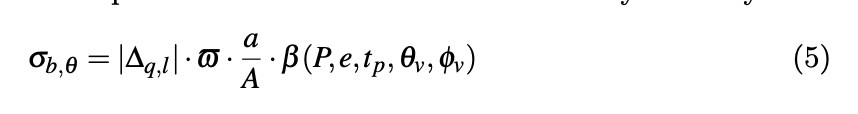

In [24]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/astr_error.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed

In [25]:
# write a function that calculates the values of sigma astrometric error for a given set of parameters q,l,omega,a,A,beta_0
def sigma_astrometric_error(q, l, pllx, a, A, beta_0):
    term_1 = np.abs((q - l) / ((1 + q) * (1 + l)))
    term_2 = pllx
    term_3 = a/A
    term_4 = beta_0

    sigma = term_1*term_2*term_3*term_4
    return sigma

# calculate sigma_astrometric_error for all the data points in the dataframe
df['sigma_astrometric_error'] = sigma_astrometric_error(df['q'], df['l'], df['pllx'], df['a'], AU, df['beta_0'])

# Calculate inferred P and q 

### assume $\sigma_{ast}$ = 0.3 and $\sigma_{spec}$ = 1

In [26]:
df.columns

Index(['RA', 'Dec', 'pmRA', 'pmDec', 'pllx', 'M_tot', 'q', 'l', 'a', 'e', 'P',
       'tPeri', 'vTheta', 'vPhi', 'vOmega', 'predict_dTheta', 'simple_dTheta',
       'N_obs', 'sigma_al', 'sigma_ac', 'fit_ra', 'fit_dec', 'fit_pmrac',
       'fit_pmdec', 'fit_pllx', 'sigma_rac', 'sigma_dec', 'sigma_pmrac',
       'sigma_pmdec', 'sigma_pllx', 'N_vis', 'frac_good', 'AEN', 'UWE',
       'N_orb', 'zeta_0', 'beta_0', 'sigma_spectroscopic_error',
       'sigma_astrometric_error'],
      dtype='object')

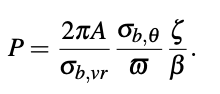

In [28]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/inferred_P.png'
display(Image(filename=img_path, width=300, height=200))  # Adjust width and height as needed

In [29]:
import numpy as np
import pandas as pd

# Define the function to calculate inferred P
def inferred_P(A, sigma_spectroscopic_error, sigma_astrometric_error, parallax, zeta_0, beta_0):
    term_1 = (2 * np.pi * A) / sigma_spectroscopic_error
    term_2 = sigma_astrometric_error / parallax
    term_3 = zeta_0 / beta_0
    return term_1 * term_2 * term_3

# Apply the function to each row in the DataFrame
df['inferred_P'] = inferred_P(AU, df['sigma_spectroscopic_error'], df['sigma_astrometric_error'], df['pllx'], df['zeta_0'], df['beta_0'])


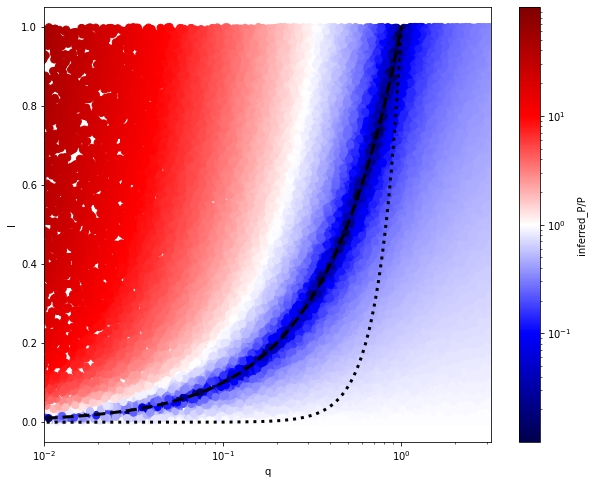

In [34]:
from matplotlib.colors import LogNorm

# keep df where df['P']/df['inferred_P'] is less than or equal to 10 and greater than or equal to 0.1
df_P = df[(df['inferred_P']/df['P'] <= 100) & (df['inferred_P']/df['P'] >= 0.01)]

# figure size
plt.figure(figsize=(10, 8))

# plot on the x axis q and on the y axis l and colormap the points by inferred_P/P with small points and name the colorbar
# i want the color map thats really colorful
# not a scatter plot i want it smooth
# use a colormap that goes from blue to red
plt.scatter(df_P['q'], df_P['l'], c=df_P['inferred_P']/df_P['P'], cmap='seismic', s=50, norm=LogNorm())
l_points = np.linspace(0, 1, 1000)
q_points = np.linspace(0, 1, 1000)
# draw a thick dotted line for l = q
plt.plot(q_points, l_points, 'k--', linewidth=3)
# draw a thick grey dotted line for l = q**3.5
plt.plot(q_points, q_points**3.5, 'k:', linewidth=3)
plt.xlabel('q')
plt.ylabel('l')
plt.xscale('log')
plt.xlim(10**-2, 10**0.5)
plt.colorbar(label='inferred_P/P')
plt.show()

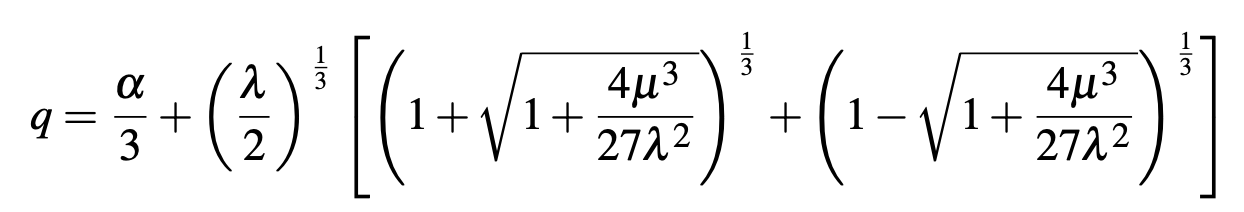

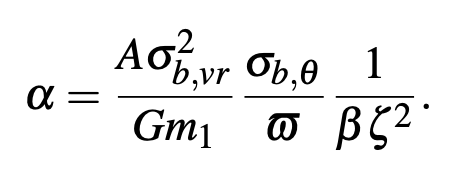

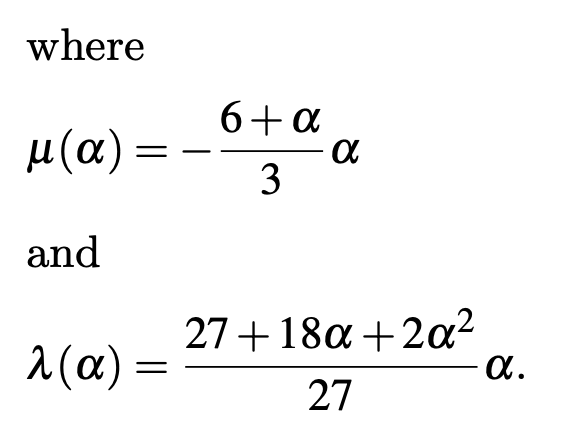

In [35]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/inferred_q.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed

# Display an image from a local file with specified size
img_path = 'images/solve_q_1.png'
display(Image(filename=img_path, width=150, height=100))  # Adjust width and height as needed

# Display an image from a local file with specified size
img_path = 'images/solve_q_2.png'
display(Image(filename=img_path, width=150, height=100))  # Adjust width and height as needed

In [36]:
def solve_q(A, sigma_spectroscopic_error, sigma_astrometric_error, parallax, zeta_0, beta_0, m_1):

    alpha = ((A * (sigma_spectroscopic_error**2)) / (G * m_1)) * (sigma_astrometric_error / parallax) * (1 / (beta_0 * zeta_0**2))
    mu = - (((6 + alpha) / 3) * alpha)
    lam = ((27 + (18 * alpha) + (2 * alpha**2)) / 27) * alpha

    q = (alpha / 3) + ((lam / 2)**(1/3)) * (
        (1 + np.sqrt(1 + (4 * mu**3) / (27 * lam**2)))**(1/3) + 
        (1 - np.sqrt(1 + (4 * mu**3) / (27 * lam**2)))**(1/3)
    )

    return q

# Apply the function to each row in the DataFrame
df['inferred_q'] = solve_q(AU, df['sigma_spectroscopic_error'], df['sigma_astrometric_error'], df['pllx'], df['zeta_0'], df['beta_0'], m_1)


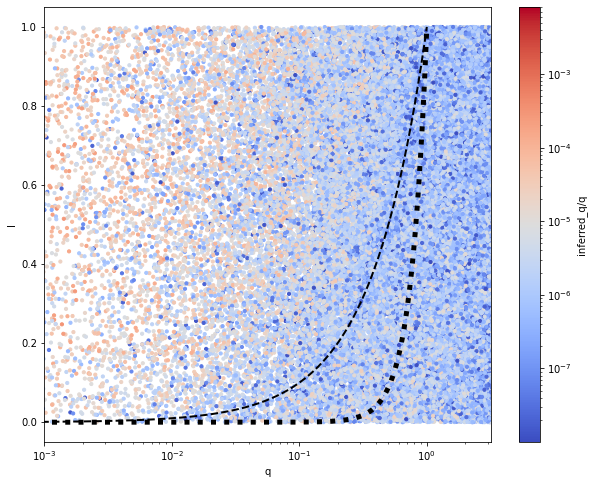

In [37]:
from matplotlib.colors import LogNorm

# figure size
plt.figure(figsize=(10, 8))

df_q = df[(df['inferred_q']/df['q'] <= 10) & (df['inferred_q']/df['q'] >= 10e-9)]

# plot on the x axis q and on the y axis l and colormap the points by inferred_P/P with small points and name the colorbar
plt.scatter(df_q['q'], df_q['l'], c=df_q['inferred_q']/df_q['q'], cmap='coolwarm', s=10, norm=LogNorm())
l_points = np.linspace(0, 1, 1000)
q_points = np.linspace(0, 1, 1000)
# draw a thick dotted line for l = q
plt.plot(q_points, l_points, 'k--', linewidth=2)
# draw a thick grey dotted line for l = q**3.5
plt.plot(q_points, q_points**3.5, 'k:', linewidth=5)
plt.xlabel('q')
plt.ylabel('l')
plt.xscale('log')
plt.xlim(10**-3, 10**0.5)
plt.colorbar(label='inferred_q/q')
plt.show()

### q vs inferred q

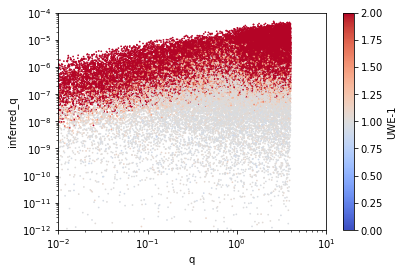

In [38]:
# set colormap axis from 0 to 2
norm = mpl.colors.Normalize(vmin=0, vmax=2)

# plot inferred q vs q and colormap for UWE - 1
plt.scatter(df['q'], df['inferred_q'], c=df['UWE'], cmap='coolwarm', s=0.5, norm=norm)
plt.xlabel('q')
plt.ylabel('inferred_q')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**-2, 10**1)
plt.ylim(10**-12, 10**-4)
plt.colorbar(label='UWE-1')
plt.show()


### P vs inferred P

In [ ]:
# plot inferred P vs P and colormap for UWE - 1
plt.scatter(df['P'], df['inferred_P'], c=df['UWE']-1, cmap='coolwarm', s=0.5)
plt.xlabel('P')
plt.ylabel('inferred_P')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='UWE-1')
plt.show()

In [ ]:
# plot xi_0 on the y axis vs P on the x axis
plt.scatter(df['P'], df['zeta_0'], s=0.01)
plt.xlabel('P')
plt.ylabel('zeta_0')
plt.yscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# plot xi_0 on the y axis vs P on the x axis
plt.scatter(df['P'], df['beta_0'], s=0.01)
plt.xlabel('P')
plt.ylabel('zeta_0')
plt.yscale('log')
plt.yscale('log')
plt.show()